In [284]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df01=pd.read_csv('bengaluru_house_prices.csv')
df01.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [285]:
df01.shape

(13320, 9)

In [286]:
df01[0:3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [287]:
df01['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [288]:
df02=df01.drop(['area_type','availability','society','balcony'],axis=1)
df02

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [289]:
df02.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [290]:
df03=df02.dropna()
df03.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [291]:
df03['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [292]:
df03['bhk']=df03['size'].apply(lambda x: int(x.split()[0]))
df03.head()

C:\Users\mandy\AppData\Local\Temp\ipykernel_42520\143954102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df03['bhk']=df03['size'].apply(lambda x: int(x.split()[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [293]:
df03['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [294]:
df03[df03['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [295]:
df03

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [296]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [297]:
df03[~df03['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [298]:
def convert_range_to_mean(x):
    if is_float(x)==False:
        token=x.split('-')
        if len(token)==2:
            return (float(x.split('-')[0])+float(x.split('-')[1]))/2
        else:
            return np.nan
    else:
        return x

In [299]:
df03['total_sqft']=df03['total_sqft'].apply(convert_range_to_mean)
df03


C:\Users\mandy\AppData\Local\Temp\ipykernel_42520\3854824687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df03['total_sqft']=df03['total_sqft'].apply(convert_range_to_mean)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [300]:
df03.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [301]:
convert_range_to_mean(2.0)

2.0

In [302]:
convert_range_to_mean('2 - 4')

3.0

In [303]:
convert_range_to_mean('2true')

nan

In [304]:
df03['total_sqft'][30]

2475.0

In [305]:
df03['total_sqft'].isna().sum()

46

In [306]:
df04=df03.dropna()

In [307]:
df04.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [308]:
df04['total_sqft']=pd.to_numeric(df04['total_sqft'],errors='coerce')


C:\Users\mandy\AppData\Local\Temp\ipykernel_42520\2580805666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df04['total_sqft']=pd.to_numeric(df04['total_sqft'],errors='coerce')


In [309]:
df04['total_sqft'].dtypes

dtype('float64')

In [310]:
df04[df04['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [311]:
df04.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [312]:
' hello world '.strip()

'hello world'

In [313]:
df04.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [314]:
df04['total_sqft'].astype('float64')

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13200, dtype: float64

In [315]:
df04.reset_index(drop=True,inplace=True)
df04

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [316]:
for i in range(len(df04['total_sqft'])):
    if isinstance(df04['total_sqft'][i],float)==False:
        print(x)

In [317]:
df04['price_per_sqft']=(df04['price']*100000)/(df04['total_sqft'])

C:\Users\mandy\AppData\Local\Temp\ipykernel_42520\324002550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df04['price_per_sqft']=(df04['price']*100000)/(df04['total_sqft'])


In [318]:
df04.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [319]:
len(df04['location'].unique())

1298

In [320]:
loc_stats=df04.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [321]:
len(loc_stats[loc_stats<=10])

1058

In [322]:
loc_stats_under10=loc_stats[loc_stats<=10]
loc_stats_under10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [323]:
df04['location'].value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [324]:
df05=df04.copy()

In [325]:
df05['location']=df05['location'].apply(lambda x: 'other' if x in loc_stats_under10 else x)

In [326]:
df05['location'].nunique()

241

In [327]:
df05[df05['total_sqft']/df05['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
57,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
67,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
69,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13159,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13161,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13183,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [328]:
df05.shape

(13200, 7)

In [329]:
df06=df05[~(df05['total_sqft']/df05['bhk']<300)]

In [330]:
df06.shape

(12456, 7)

In [331]:
df06['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [332]:
df06.shape

(12456, 7)

In [333]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m1=np.mean(subdf['price_per_sqft'])
        st1=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft']>(m1-st1)) & (subdf['price_per_sqft']<=(m1+st1))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df07 = remove_outliers(df06)
df07.shape

(10245, 7)

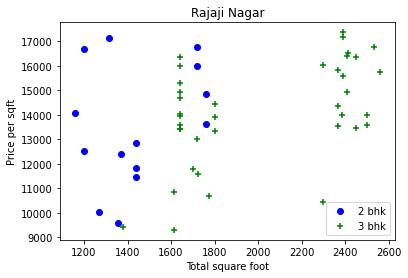

In [342]:
def plot_scatter(df,location):
    bhk2=df[(df['location']==location) & (df['bhk']==2)]
    bhk3=df[(df['location']==location) & (df['bhk']==3)]
    plt.scatter(bhk2['total_sqft'],bhk2['price_per_sqft'],color='blue',label='2 bhk')
    plt.scatter(bhk3['total_sqft'],bhk3['price_per_sqft'],color='green',marker='+',label='3 bhk')
    plt.xlabel('Total square foot')
    plt.ylabel('Price per sqft')
    plt.title(location)
    plt.legend()
    
plot_scatter(df07,'Rajaji Nagar')

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices=np.array[()]
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean'=np.mean(bhk_df['price_per_sqft']),
                'stdev'=np.std(bhk_df['price_per_sqft']),
                'count'=bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk')